---
### Machine Learning Statistics
---

In [1]:
import numpy as np,  pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()

---
#### Univariate Statistics
---

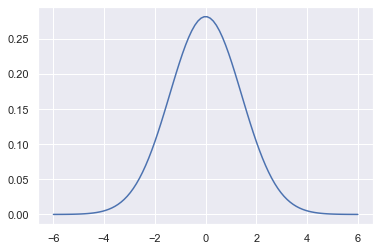

In [2]:
# Normal distributions
from scipy.stats import norm
mu = 0
variance = 2
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*variance, mu + 3*variance, 100)

plt.plot(x, norm.pdf(x, mu, sigma));

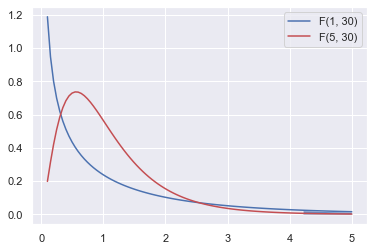

In [3]:
#Chi-square distribution
from scipy.stats import f

fvalues = np.linspace(0.1, 5, 100)

#Probability Density Function at x of f
plt.plot(fvalues, f.pdf(fvalues, 1, 30), 'b-', label = 'F(1, 30)')
plt.plot(fvalues, f.pdf(fvalues, 5, 30), 'r-', label = 'F(5, 30)')
plt.legend()

#Cumulative Distribution Function of f
prob_f = f.cdf(3, 1, 30)

#Percentage Point Function (CDF inverse) of q at F
prob_95 = f.ppf(0.95, 1, 30)
assert f.cdf(prob_95, 1, 30) == 0.95

#Survival Function (1 - CDF) at x of F
prob_SF = f.sf(3, 1, 30)
assert prob_f + prob_SF == 1

#P-Value: P(F(1, 30)) < 0.05
Low_f = fvalues[fvalues > prob_95]
plt.fill_between(Low_f, 0, f.pdf(Low_f, 1 ,30), alpha = 0.8, label = 'P < 0.05')
plt.show;

__Flip coin: Real Example__

60 heads have been found over 100 flips, is it coins biased ?

- Model the data: number of heads follow a Binomial disctribution.
- Compute model parameters: N=100, P=60/100.
- Compute a test statistic, same as frequency.
- Compute a test statistic: 60/100.
- Under the null hypothesis the distribution of the number of tail (𝑘) follow the binomial distribution of parameters N=100, P=0.5:

0.018


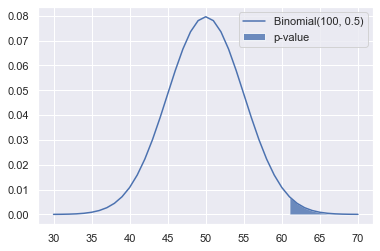

In [4]:
import scipy.stats as ss
succes = np.linspace(30, 70, 41)
plt.plot(succes, ss.binom.pmf(succes, 100, 0.5), 'b-', label = 'Binomial(100, 0.5)')

upper_t = succes[succes > 60]
plt.fill_between(upper_t, 0, ss.binom.pmf(upper_t, 100, 0.5), alpha = 0.8, label = 'p-value')
plt.legend();

pval = 1 - ss.binom.cdf(60, 100, 0.5)
print(round(pval,3))

#### Random sampling of the binomial distribution

[60 52 51 55 41 48 47 43 50 53]
P-value using monte-carlo sampling of the Binomial distribution under H0 =  0.024
C:\Users\Daniel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


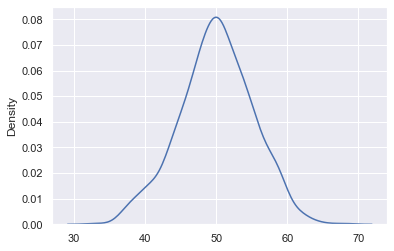

In [5]:
sccess_h0 = ss.binom.rvs(100, 0.5, size = 1000, random_state = 4)
print(sccess_h0[:10])

import seaborn as sns
_ = sns.distplot(sccess_h0, hist = False)

pval_rnd = np.sum(sccess_h0 >= 60) / (len(sccess_h0) + 1)
print("P-value using monte-carlo sampling of the Binomial distribution under H0 = ", round(pval_rnd,3))

__One sample 𝑡-test__

The one-sample 𝑡-test is used to determine whether a sample comes from a population with a specific mean. For example you want to test if the average height of a population is 1.75 𝑚.

__Example__

Given the following samples, we will test whether its true mean is 1.75. Warning, when computing the std or the variance, set ddof=1. The default value, ddof=0, leads to the biased estimator of the variance.

In [6]:
x = [1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87]

xbar = np.mean(x) #sample mean
mu0 = 1.75 #hypothesized value
s = np.std(x, ddof = 1) #sample stanadard deve
n = len(x) # sample size

print(round(xbar,3))

t_obs = (xbar - mu0) / (s / np.sqrt(n))
print(round(t_obs,3))

1.816
2.397


The p-value is the probability to observe a value 𝑡 more extreme than the observed one 𝑡𝑜𝑏𝑠 under the null hypothesis 𝐻0: 𝑃(𝑡 > 𝑡_𝑜𝑏𝑠|𝐻0)

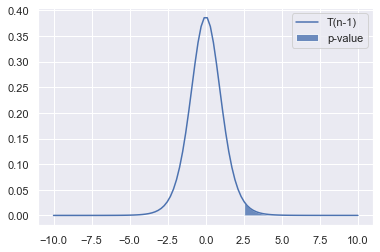

In [7]:
t_val = np.linspace(-10,10,100)
plt.plot(t_val, ss.t.pdf(t_val,n - 1), 'b-', label = 'T(n-1)')

upper_t = t_val[t_val > t_obs]
plt.fill_between(upper_t, 0, ss.t.pdf(upper_t, n - 1), alpha = 0.8, label = 'p-value')
plt.legend();

__Testing pairwise associations__

__Univariate analysis: association betweens pairs of variables.__ 

- A categorical variable can take on one of a limited number of possible values. Where number of levels = 2: binomial; Number of levels > 2: multinomial.
- An ordinal variable is a categorical variable with a clear ordering of the levels. For example: drinks per day (none, small, medium and high).
- A continuous or quantitative variable 𝑥 ∈ R is one that can take any value in a range of possible values, possibly infinite. E.g.: salary, experience in years, weight. What statistical test should I use?

In [8]:
n = 50 
x = np.random.normal(size = n)
y = 2 * x + np.random.normal(size = n)

#Compute with SciPy
cor, pval = ss.pearsonr(x, y)
print(cor,pval)

0.8869476340728065 1.01340288213708e-17


Example

Given the following two samples, test whether their means are equal using the standard t-test, assuming equal variance

In [9]:
height = np.array([ 1.83, 1.83, 1.73, 1.82, 1.83, 1.73, 1.99, 1.85, 1.68, 1.87, 
                   1.66, 1.71, 1.73, 1.64, 1.70, 1.60, 1.79, 1.73, 1.62, 1.77])

grp = np.array(['M'] * 10 + ['F'] * 10)

#Compute with SciPy
print(ss.ttest_ind(height[grp == 'M'], height[grp == 'F'], equal_var = True))

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)


__ANOVA 𝐹-test (quantitative ~ categorial (>=2 levels))__ 

- Analysis of variance (ANOVA) provides a statistical test of whether or not the means of several groups are equal, and therefore generalizes the 𝑡-test to more than two groups.
- ANOVAs are useful for testing three or more means for statistical significance.
- It is conceptually similar to multiple two-sample 𝑡-tests, but is less conservative.

Here we will consider one-way ANOVA with one independent variable.

In [10]:
import scipy.stats as ss
# Dataset: 15 samples, 10 first exposed
exposed = np.array([1] * 10 + [0] * 10)

#8 first with cancer, 10 without, the last two with
cancer = np.array([1] * 8 + [0] * 10 + [1] * 2)

crosstab = pd.crosstab(exposed, cancer, rownames =  ['exposed'], colnames = ['cancer'])
print("Observed table:")
print("---------------")
print(crosstab)

chi2, pval, dof, expected = ss.chi2_contingency(crosstab)
print("Statistics:")
print("-----------")
print("Chi2 = %f, pval = %f" % (chi2, pval))
print("Expected table:")
print("---------------")
print(expected)

Observed table:
---------------
cancer   0  1
exposed      
0        8  2
1        2  8
Statistics:
-----------
Chi2 = 5.000000, pval = 0.025347
Expected table:
---------------
[[5. 5.]
 [5. 5.]]


Computing expected cross-table

In [11]:
exposed_marg = crosstab.sum(axis = 0)
exposed_freq = exposed_marg / exposed_marg.sum()

cancer_marg = crosstab.sum(axis = 1)
cancer_freq = cancer_marg / cancer_marg.sum()

print('Exposed frequency? Yes: %.2f' % exposed_freq[0],
'No: %.2f' % exposed_freq[1])
print('\n')
print('Cancer frequency? Yes: %.2f' % cancer_freq[0],
'No: %.2f' % cancer_freq[1])
print('\n')
print('Expected frequencies:')
print(np.outer(exposed_freq, cancer_freq))
print('\n')
print('Expected cross-table (frequencies * N): ')
print(np.outer(exposed_freq, cancer_freq) * len(exposed))

Exposed frequency? Yes: 0.50 No: 0.50


Cancer frequency? Yes: 0.50 No: 0.50


Expected frequencies:
[[0.25 0.25]
 [0.25 0.25]]


Expected cross-table (frequencies * N): 
[[5. 5.]
 [5. 5.]]


---
#### Linear Model
---

Given 𝑛 random samples the linear regression models the relation between the observations and the independent variables is formulated as:

𝑦𝑖 = 𝛽0 + 𝛽1𝑥1𝑖 + · · · + 𝛽𝑝𝑥𝑝𝑖 + 𝜀𝑖 𝑖 = 1, . . . , 𝑛

- The 𝛽’s are the model parameters, (regression coeficients).
- 𝛽0 is the intercept (bias).
- 𝜀𝑖 are the residuals.

An independent variable (IV).
- It's a variable that isn’t changed by the other variables you measure.
- A dependent variable depends on other factors. For example, a test score could be a dependent variable because it could change depending on several factors such as how much you studied, how much sleep you got. Usually when you are looking for a relationship between two things you are trying to find out what makes the dependent variable change the way it does.
- In Machine Learning this variable is called a target variable.

#### Simple regression

Using the dataset “salary”, explore the association between the dependant variable (e.g. Salary) and the independent variable (e.g.: Experience is quantitative).

In [12]:
from scipy import stats as ss
url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/salary_table.csv' 
salary = pd.read_csv(url)

y = 491.486913 x + 13584.043803, 
, r: 0.538886, r-squared: 0.290398,
p-value: 0.000112, std_err: 115.823381 

Regression line / scatterplot


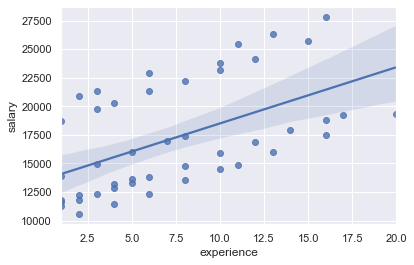

In [13]:
y, x = salary.salary, salary.experience
beta, beta0, r_val, p_val, std_err = ss.linregress(x, y)

print("y = %f x + %f, \n, r: %f, r-squared: %f,\np-value: %f, std_err: %f" % (beta, beta0, r_val, r_val**2, p_val, std_err),'\n')
print("Regression line / scatterplot")
yhat = beta * x + beta0 # regression line
sns.regplot(x = 'experience', y = 'salary', data = salary);

---
#### Multiple Regression
---

Muliple Linear Regression is one of the most common supervised learning algorithms.

Given: a set of training data {𝑥1, ..., 𝑥𝑁} with corresponding targets {𝑦1, ..., 𝑦𝑁}.

In linear regression, we assume that the model that generates the data involves only a linear combination of the input variables.

In [14]:
from scipy import linalg
np.random.seed(seed=42) # make the example reproducible

#Dataset
N, P = 50, 4
X = np.random.normal(size = N * P).reshape((N, P))

#Our model needs an intercept, add column of ones
X[:, 0] = 1

betastar = np.array([10, 1, 0.5, 0.1])
e = np.random.normal(size = N)
y = np.dot(X, betastar) + e

#Estimate parameters
Xpinv = linalg.pinv2(X)
betahat = np.dot(Xpinv, y)
print('Estimated beta:\n', betahat)

Estimated beta:
 [10.14742501  0.57938106  0.51654653  0.17862194]


---
#### Linear Model with StatsModel
---

__Interface with StatsModel__

In [15]:
import statsmodels.api as sm

#Fit and summary
model = sm.OLS(y, X).fit()
print(model.summary())

#Prediction of new values
ypred = model.predict(X)

#Residuals + prediction == true value
assert np.all(ypred + model.resid == y)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           0.000106
Time:                        19:17:45   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.1474      0.150     67.520      0.0

__Interface with Pandas__

Use R language syntax for data.frame.

For an additive model: 𝑦𝑖 = 𝛽0 + 𝑥1𝑖 𝛽1 + 𝑥2𝑖𝛽2 + 𝜖𝑖 ≡ y ~ x1 + x2.

In [16]:
import statsmodels.formula.api as smfrmla
df = pd.DataFrame(np.column_stack([X, y]), columns = [ 'inter', 'x1', 'x2', 'x3', 'y'])
print(df.columns, df.shape)

#Build a model excluding the intercept, it is implicit
model = smfrmla.ols('y~x1 + x2  + x3', df).fit()
print(model.summary())

Index(['inter', 'x1', 'x2', 'x3', 'y'], dtype='object') (50, 5)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.748
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           0.000106
Time:                        19:17:45   Log-Likelihood:                -71.271
No. Observations:                  50   AIC:                             150.5
Df Residuals:                      46   BIC:                             158.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

---
#### Multiple regression with categorical independent variables: Analysis of covariance (ANCOVA)
---

- Analysis of covariance (ANCOVA) is a linear model that blends ANOVA and linear regression.
- ANCOVA evaluates whether population means of a dependent variable (DV) are equal across levels of a categorical independent variable (IV) often called a treatment, while statistically controlling for the effects of other quantitative or continuous variables that are not of primary interest, known as covariates (CV).

In [17]:
try:
    df = pd.read("../datasets/salary_table.csv")
    
except:
    url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/salary_table.csv'
    df = pd.read_csv(url)

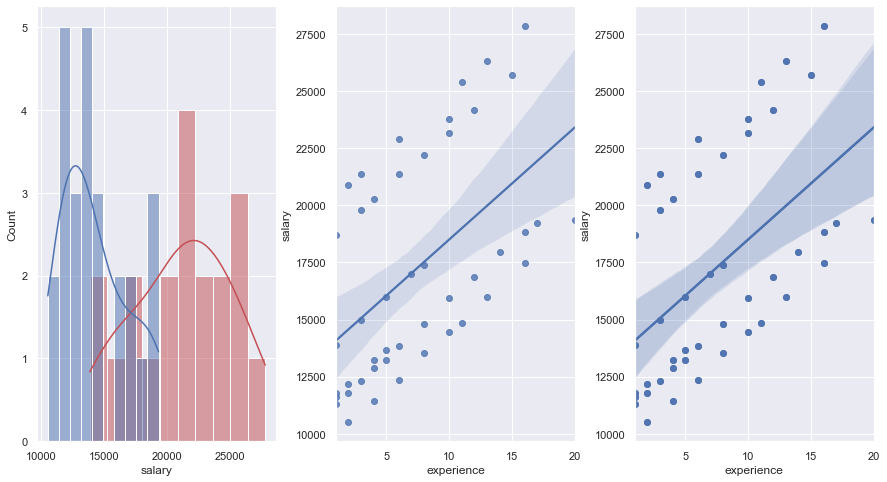

In [18]:
fig, axes = plt.subplots(1, 3, figsize= (15, 8))
plt.subplots_adjust(wspace = 0.25)

sns.histplot(df.salary[df.management == 'Y'], color = 'r', bins = 10, label = 'Management:Y', ax = axes[0], kde = True)
sns.histplot(df.salary[df.management == 'N'], color = 'b', bins = 10, label = 'Management:N', ax = axes[0], kde = True)

sns.regplot(x = 'experience', y = 'salary', data = df, ax = axes[1])
sns.regplot(x = 'experience', y = 'salary', color = 'b', data = df, ax = axes[2])
sns.regplot(x = 'experience', y = 'salary', data = df, ax = axes[2]);

__One-way AN(C)OVA__

- ANOVA: one categorical independent variable, i.e. one factor.
- ANCOVA: ANOVA with some covariates.

In [19]:
import statsmodels.formula.api as smfrmla

oneway = smfrmla.ols('salary ~ management + experience', df).fit()
print(oneway.summary())
print('\n')

aov = sm.stats.anova_lm(oneway, typ = 2) #type 2 ANOVA datafram
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     138.2
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.90e-19
Time:                        19:17:46   Log-Likelihood:                -407.76
No. Observations:                  46   AIC:                             821.5
Df Residuals:                      43   BIC:                             827.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.021e+04    525.999     

__Two-way AN(C)OVA__

Ancova with two categorical independent variables, i.e. two factors.

In [20]:
twoway = smfrmla.ols('salary ~ education + management + experience', df).fit()
print(twoway.summary())
print('\n')

aov = sm.stats.anova_lm(twoway, typ = 2)
print(aov)

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     226.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           2.23e-27
Time:                        19:17:46   Log-Likelihood:                -381.63
No. Observations:                  46   AIC:                             773.3
Df Residuals:                      41   BIC:                             782.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            8035.5976    

__Comparing two nested models__

oneway is nested within twoway. Comparing two nested models tells us if the additional predictors (i.e. education) of the full model significantly decrease the residuals. Such comparison can be done using an 𝐹-test on residuals:

In [21]:
print(twoway.compare_f_test(oneway))

(43.35158945918111, 7.67244957049531e-11, 2.0)


__Factor Coding__

In [22]:
print(twoway.model.data.param_names)
print('\n')
print(twoway.model.data.exog[:10,:])

['Intercept', 'education[T.Master]', 'education[T.Ph.D]', 'management[T.Y]', 'experience']


[[1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [1. 0. 1. 0. 1.]
 [1. 1. 0. 1. 2.]
 [1. 1. 0. 0. 2.]
 [1. 0. 0. 0. 2.]
 [1. 0. 1. 0. 2.]
 [1. 1. 0. 0. 3.]]


__Multiple Comparrisons__

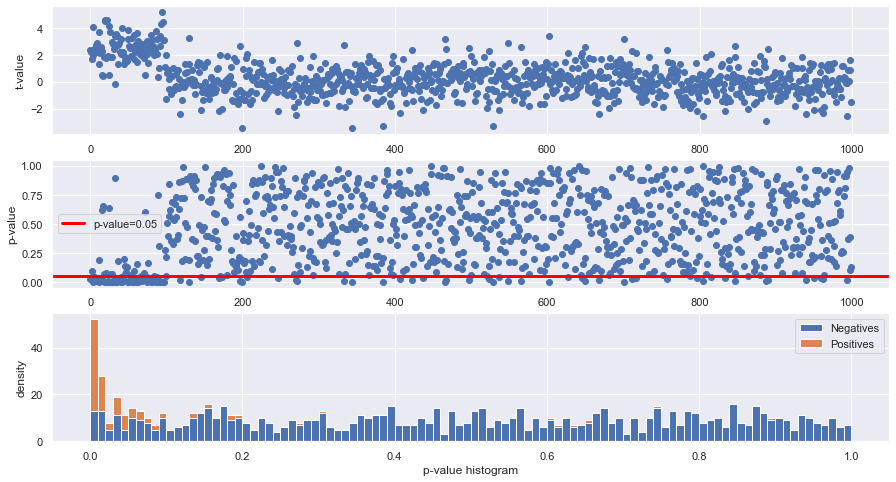

In [23]:
np.random.seed(seed = 42)

#Data
n_samples, n_features = 100, 1000
n_info = int(n_features / 10)
n1, n2 = int(n_samples / 2), n_samples - int(n_samples / 2)
snr = 0.5

Y = np.random.randn(n_samples, n_features)
grp = np.array(['g1'] * n1 + ['g2'] * n2)

#Add some grou effects for P_info features
Y[grp == 'g1', : n_info] += snr

tvals, pvals = np.full(n_features, np.NAN), np.full(n_features, np.NAN)

for j in range(n_features):
    tvals[j], pvals[j] = ss.ttest_ind(Y[grp == 'g1', j], Y[grp == 'g2', j], equal_var = True)

    
fig, axis = plt.subplots(3, 1, figsize = (15, 8))

axis[0].plot(range(n_features), tvals, 'o')
axis[0].set_ylabel('t-value')

axis[1].plot(range(n_features), pvals, 'o')
axis[1].axhline(y=0.05, color='red', linewidth=3, label="p-value=0.05")
axis[1].set_ylabel("p-value")
axis[1].legend()

axis[2].hist([pvals[n_info:], pvals[:n_info]],stacked=True, bins=100, label=["Negatives", "Positives"])
axis[2].set_xlabel("p-value histogram")
axis[2].set_ylabel("density")
axis[2].legend();

Note that under the null hypothesis the distribution of the p-values is uniform. Statistical measures:

- True Positive (TP) equivalent to a hit. The test correctly concludes the presence of an effect.
- True Negative (TN). The test correctly concludes the absence of an effect.
- False Positive (FP) equivalent to a false alarm, Type I error. The test improperly concludes the presence of an effect. Thresholding at 𝑝-value < 0.05 leads to 47 FP.
- False Negative (FN) equivalent to a miss, Type II error. The test improperly concludes the absence of an effect.

In [24]:
P, N = n_info, n_features - n_info # Positives, Negatives
TP = np.sum(pvals[:n_info ] < 0.05) # True Positives
FP = np.sum(pvals[n_info: ] < 0.05) # False Positives
print("No correction, FP: %i (expected: %.2f), TP: %i" % (FP, N * 0.05, TP))

No correction, FP: 47 (expected: 45.00), TP: 71


__Bonferroni correction for multiple comparisons__

The Bonferroni correction is based on the idea that if an experimenter is testing 𝑃 hypotheses, then one way of maintaining the familywise error rate (FWER) is to test each individual hypothesis at a statistical significance level of 1/𝑃 times the desired maximum overall level.

So, if the desired significance level for the whole family of tests is 𝛼 (usually 0.05), then the Bonferroni correction would test each individual hypothesis at a significance level of 𝛼/𝑃. For example, if a trial is testing 𝑃 = 8 hypotheses with a desired 𝛼 = 0.05, then the Bonferroni correction would test each individual hypothesis at 𝛼 = 0.05/8 = 0.00625.

In [25]:
import statsmodels.sandbox.stats.multicomp as multicomp

_, pvals_fwer, _, _ = multicomp.multipletests(pvals, alpha=0.05,
method='bonferroni')
TP = np.sum(pvals_fwer[:n_info ] < 0.05) # True Positives
FP = np.sum(pvals_fwer[n_info: ] < 0.05) # False Positives
print("FWER correction, FP: %i, TP: %i" % (FP, TP))

FWER correction, FP: 0, TP: 6


__The False discovery rate (FDR) correction for multiple comparisons__

FDR-controlling procedures are designed to control the expected proportion of rejected null hypotheses that were incorrect rejections (“false discoveries”). FDR-controlling procedures provide less stringent control of Type I errors compared to the familywise error rate (FWER) controlling procedures (such as the Bonferroni correction), which control the probability of at least one Type I error. Thus, FDR-controlling procedures have greater power, at the cost of increased rates of Type I errors.

In [26]:
import statsmodels.sandbox.stats.multicomp as multicomp
_, pvals_fdr, _, _ = multicomp.multipletests(pvals, alpha=0.05,
method='fdr_bh')
TP = np.sum(pvals_fdr[:n_info ] < 0.05) # True Positives
FP = np.sum(pvals_fdr[n_info: ] < 0.05) # False Positives
print("FDR correction, FP: %i, TP: %i" % (FP, TP))

FDR correction, FP: 3, TP: 20
